# Graficas de señales en dominio de tiempo y frecuencia
# Laboratorio de EMG 

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Gráfica en el dominio del tiempo

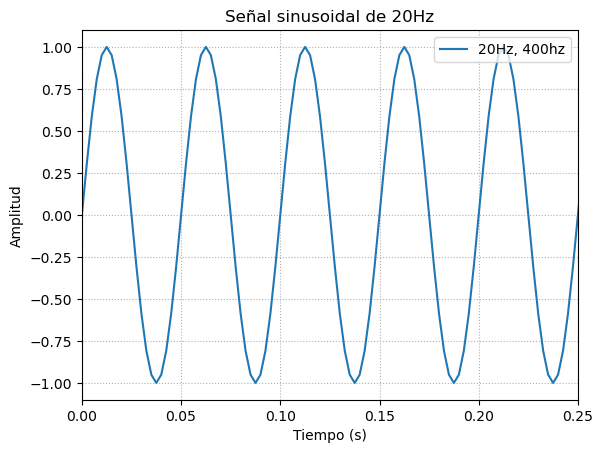

In [98]:
F = 20                    # Frecuencia
T = 1/F                   # Periodo
Fs = 20*F                  # nyquist debe ser al menos 2 veces, se recomienda que sea por lo menos 10 veces
Ts = 1/Fs                 # Periodo de muestreo

w = 2*np.pi*F             # velocidad angular
phi = 0                   # fase, para facilitar usaremos 0 grados, es decir que no hay desfase

n = np.arange(0,1000)     #  1000 muestras, [0-999]
t = n*Ts                  # En tiempo discreto
signal1 = np.sin(w*t+phi) # señal

plt.plot(t, signal1, label=f"{F}Hz, {Fs}hz")      # graficamos la señal
plt.xlim(0,5*T)          # lo acotamos para visualizar 5 peridos de la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title(f"Señal sinusoidal de {F}Hz")
plt.legend(loc="upper right")
plt.show()

## Gráfica en el dominio de la frecuencia

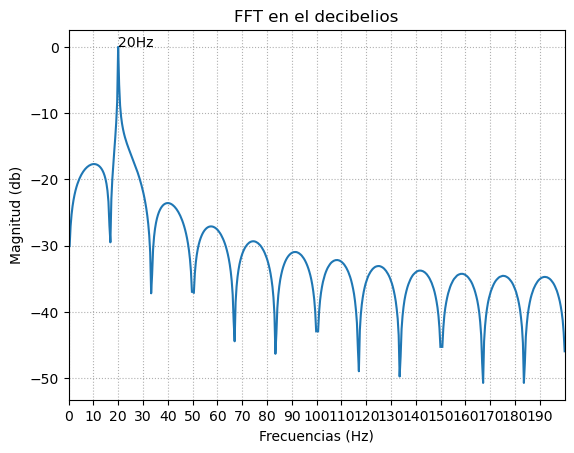

In [65]:
N = 2**10                                     # 10 bits, 0-1023
signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2]
signal_aux = signal_fft/signal_fft.max()

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)


plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()

## Guardar la señal

In [103]:
#t[:10]

In [99]:
#array_aux =np.vstack([t, signal1]).T
#array_aux

In [100]:
#df = pd.DataFrame(array_aux, columns=["t","x"])
#df.head()

In [101]:
#df.to_csv('signal1.txt', index=False)

In [102]:
#plt.plot(df.iloc[:,0],df.iloc[:,1])